<a href="https://colab.research.google.com/github/loosak/pysnippets/blob/master/nmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regular expressions
mathematics and computer science theory, where it reflects a trait of mathematical expressions called regularity. Such an expression can be implemented in software using a deterministic finite automaton (DFA). A DFA is a finite state machine that doesn’t use backtracking.

modern-day Perl-style regular expressions are not regular expressions at all in the mathematical sense. They’re implemented with a nondeterministic finite automaton (NFA).

## backtracking

## Search-and-replace
Search-and-replace is a common job for regular expressions. A search-and-replace function takes a subject string, a regular expression, and a replacement string as input. The output is the subject string with all matches of the regular expression replaced with the replacement text.

![Tahák pro RE](https://www.wr.cz/assets/resized/images/1400/re-color-a4.webp)

- A regular expression followed by a + (plus sign) matches one or more occurrences of the regular expression.
- A regular expression followed by a ? (question mark) matches zero or one occurrence of the regular expression.
- Multiple regular expressions separated by a | (vertical bar) or by a new-line character match strings that are matched by any of the regular expressions.
- A regular expression may be enclosed in ( ) (parentheses) for grouping.


1. Atom 
- konkrétní znak, 
- jeden znak z množiny [a-z]
- znak z doplnku množiny [^abc]
- libovolný znak ., 
- skupina uzavřená v závorkách.

2. kvantifikátor
- `*` [0-inf]
- `+` [1-inf]
- {min,max}

3. kotva 
- ^ , $ řádek
- < , > slovo

[cheatography.com](https://cheatography.com/davechild/cheat-sheets/regular-expressions/)

## Python basic types of regular expression search methods 

1. `re.match()`
Search the regular expression pattern on the first line and return the match object. (Only searches the first line.) If a match is not found, returns None.

2. `re.search()`
Search the regular expression pattern and return the first occurrence. Unlike the re. match() method, this method will check all lines. If a match is not found, returns None.

3. `re.findall()`
Search the regular expression pattern and match all occurrences. Unlike the re.match() or re.search() method, this method returns all the nonoverlapping matches of patterns in a string as a list of strings.

4. `re.finditer()`
Search the regular expression pattern, and this method returns an iterator yielding MatchObject instances over all nonoverlapping matches for the string’s re pattern.
    

In [ ]:
import re

re.findall(r'[a-z]+|[0-9]+', 'abc 123')

['abc', '123']

In [ ]:
re.findall(r'^[0-9]+|[A-z]+', '123 AlNm mm x12')

['123', 'AlNm', 'mm', 'x']

In [ ]:
# a or b
import re
pattern = re.compile(r"[ab]")
match = pattern.finditer("adgbbabvcdfgfss")
[(m.start(),m.end(),m.group()) for m in match]

[(0, 1, 'a'), (3, 4, 'b'), (4, 5, 'b'), (5, 6, 'a'), (6, 7, 'b')]

In [ ]:
# find ip adress in str
import re

regex = r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}"
test_str = "My ip address is 199.9.9.9 and 10.9.8.7"
find = re.findall(regex, test_str)
find

['199.9.9.9', '10.9.8.7']

In [ ]:
import os
import re

with os.popen('ifconfig') as p:
    stdout = p.read()
regex = r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}"
re.findall(regex, stdout)

[]

In [ ]:
regex = r'^(?:25[0-5]|2[0-4]\d|[0-1]?\d{1,2})(?:\.(?:25[0-5]|2[0-4]\d|[0-1]?\d{1,2})){3}$'
re.findall(regex, test_str)

[]

In [ ]:
s = '''
[34343] | ****. "Example": <one>, yellow dog
tstring0 123
tstring1 456
tstring2 789
'''
mydog = re.compile(', (.*?)\n')
matchResult = mydog.search(s)
if matchResult:
  print(matchResult.group(1))


yellow dog


[Regular Expressions for Biologists](https://carpentries-incubator.github.io/regex-novice-biology/index.html)

[text odkazu](https://)[realpython: regexes in Python (Part 1)](https://realpython.com/regex-python/)

In [ ]:
re.search(r'^B', 'Alef Ala Abab Baba Jaga')

In [ ]:
re.search(r'.{4}', 'Alef Ala Abab Baba Jaga')

<re.Match object; span=(0, 4), match='Alef'>

In [ ]:
re.search('[0-9][0-9][0-9]', 'foo456bar').group()

'456'

In [ ]:
re.search('\d\d\d', 'foo456bar').group()

'456'

In [ ]:
# .	Matches any single character except newline
re.search('4.6', 'foo456bar').group()

'456'

In [ ]:
# {}	Matches an explicitly specified number of repetitions
re.search(r'\d{3}', 'foo456bar').group()

'456'

In [ ]:
re.search('ba[artz]', 'foobarqux')

<re.Match object; span=(3, 6), match='bar'>

In [ ]:
re.search('ba[artz]', 'foobaaquxbar')

<re.Match object; span=(3, 6), match='baa'>

In [ ]:
re.search('[0-9a-fA-f]', '--- a0 ---')

<re.Match object; span=(4, 5), match='a'>

In [ ]:
p = re.compile(
    r"[A-Za-z_]"       # letter or underscore
    r"[A-Za-z0-9_]*"   # letter, digit or underscore
)
p

In [ ]:
all_headers = "SCPU07 DISKAVGWIO CPU23 SCPU17 JFSFILE PCPU24 DISKRXFER CPU17 PCPU18 CPU02 PCPU06"
re.findall(r'\bCPU[0-9].', all_headers)

['CPU23', 'CPU17', 'CPU02']

In [ ]:
re.split(r'^Ww.', 'Words, beworkd, words, words.')

['Words, beworkd, words, words.']

In [ ]:
re.split(r'(\d+)', '111A222B333C')

['', '111', 'A', '222', 'B', '333', 'C']

In [ ]:
re.findall(r'(\d+|[A-Za-z]+)', '111A222B333C')

['111', 'A', '222', 'B', '333', 'C']

In [ ]:
import itertools

ig = itertools.groupby('111A222B333C')
list(ig)

[('1', <itertools._grouper at 0x7f2b94bab1d0>),
 ('A', <itertools._grouper at 0x7f2b94bab290>),
 ('2', <itertools._grouper at 0x7f2b94bab5d0>),
 ('B', <itertools._grouper at 0x7f2b94bab490>),
 ('3', <itertools._grouper at 0x7f2b94bab9d0>),
 ('C', <itertools._grouper at 0x7f2b94bab850>)]

In [ ]:
ig = itertools.groupby('111A222B333C', key=str.isalpha)
list(ig)

[(False, <itertools._grouper at 0x7f2b94a84650>),
 (True, <itertools._grouper at 0x7f2b94a84750>),
 (False, <itertools._grouper at 0x7f2b94a846d0>),
 (True, <itertools._grouper at 0x7f2b94a84710>),
 (False, <itertools._grouper at 0x7f2b94a84790>),
 (True, <itertools._grouper at 0x7f2b94a847d0>)]

In [ ]:
[''.join(g) for _, g in itertools.groupby('111A222B333C', key=str.isalpha)]

['111', 'A', '222', 'B', '333', 'C']

# split line begining with number

In [ ]:
re.split(r'^([0-9]*)', '123 text')

['', '123', ' text']

In [ ]:
re.split(r'^([0-9]*)|([a-zA-Z]*)', '123 text')

['', '123', None, '', None, '', ' ', None, 'text', '', None, '', '']

In [ ]:
import re
import sys

version, = re.findall(r'\d\.\d.\d{2}', sys.version)
version

'3.7.13'

In [ ]:
text = 'python2 python3 pylint pyPy'
re.findall(r'python[2|3]', text)

['python2', 'python3']

In [ ]:
import re

#the following example will only match an IP address:
#egrep '[[:digit:]]{1,3}\.[[:digit:]]{1,3}\.[[:digit:]]{1,3}\.[[:digit:]]{1,3}' file

text = """
validates:
inet0: 192.68.35.35
0.0.0.0
255.0.0.0
192.168.1.0
192.168.0.1
255.255.255.0
1.1.1.1
255.255.255.255
249.249.249.249
200.200.200.200
199.199.199.199
100.100.100.100
99.99.99.99
0.0.0.0
9.9.9.9
10.10.10.10
99.99.99.99
100.100.100.100
109.109.109.109
110.110.110.110
199.199.199.199
200.200.200.200
249.249.249.249
250.250.250.250
255.255.255.255
01.01.01.01
09.09.09.09
192.168.0.1
255.255.255.255
1.1.1.1

should not validate:
256.256.256.260
192.168.0.0/24
192.168..1
192.168.1
"""
regex = r"^(?:(?:25[0-5]|2[0-4]\d|1?\d?\d)(?:\.(?!$)|$)){4}$"
#regex = r'[[:digit:]]{1,3}\.[[:digit:]]{1,3}\.[[:digit:]]{1,3}\.[[:digit:]]{1,3}'

re.findall(regex, text, re.MULTILINE)

['0.0.0.0',
 '255.0.0.0',
 '192.168.1.0',
 '192.168.0.1',
 '255.255.255.0',
 '1.1.1.1',
 '255.255.255.255',
 '249.249.249.249',
 '200.200.200.200',
 '199.199.199.199',
 '100.100.100.100',
 '99.99.99.99',
 '0.0.0.0',
 '9.9.9.9',
 '10.10.10.10',
 '99.99.99.99',
 '100.100.100.100',
 '109.109.109.109',
 '110.110.110.110',
 '199.199.199.199',
 '200.200.200.200',
 '249.249.249.249',
 '250.250.250.250',
 '255.255.255.255',
 '01.01.01.01',
 '09.09.09.09',
 '192.168.0.1',
 '255.255.255.255',
 '1.1.1.1']

In [ ]:
matches = re.finditer(regex, text, re.MULTILINE)
list(matches)

[<re.Match object; span=(12, 24), match='192.68.35.35'>,
 <re.Match object; span=(25, 32), match='0.0.0.0'>,
 <re.Match object; span=(33, 42), match='255.0.0.0'>,
 <re.Match object; span=(43, 54), match='192.168.1.0'>,
 <re.Match object; span=(55, 66), match='192.168.0.1'>,
 <re.Match object; span=(67, 80), match='255.255.255.0'>,
 <re.Match object; span=(81, 88), match='1.1.1.1'>,
 <re.Match object; span=(89, 104), match='255.255.255.255'>,
 <re.Match object; span=(105, 120), match='249.249.249.249'>,
 <re.Match object; span=(121, 136), match='200.200.200.200'>,
 <re.Match object; span=(137, 152), match='199.199.199.199'>,
 <re.Match object; span=(153, 168), match='100.100.100.100'>,
 <re.Match object; span=(169, 180), match='99.99.99.99'>,
 <re.Match object; span=(181, 188), match='0.0.0.0'>,
 <re.Match object; span=(189, 196), match='9.9.9.9'>,
 <re.Match object; span=(197, 208), match='10.10.10.10'>,
 <re.Match object; span=(209, 220), match='99.99.99.99'>,
 <re.Match object; span=

In [ ]:
import subprocess
import io

with open('text.txt', "w") as outfile:
  subprocess.run(['echo', 'hello'], stdout=outfile)

#output = io.StringIO()
#output.getvalue()

ret = subprocess.run(['grep', 'root', '/etc/passwd'], capture_output=True)
ret.stdout.decode()

'root:x:0:0:root:/root:/bin/bash\n'

In [ ]:
import datetime as dt
import subprocess

ret = subprocess.run(['date', '+%s'], capture_output=True)
now = dt.datetime.now()

ret.stdout.decode().strip(), f"{int(now.strftime('%s')):,}"

('1660741285', '1,660,741,285')

In [ ]:
ping_cmd = ["ping", "8.8.8.8", "-c", "3"]
ret = subprocess.run(ping_cmd, capture_output=True)
ret.stdout.decode()

In [ ]:
import re
import statistics as st

text = """
PING 8.8.8.8 (8.8.8.8): 56 data bytes
64 bytes from 8.8.8.8: icmp_seq=0 ttl=114 time=18.970 ms
64 bytes from 8.8.8.8: icmp_seq=1 ttl=114 time=17.403 ms
64 bytes from 8.8.8.8: icmp_seq=2 ttl=114 time=16.835 ms

--- 8.8.8.8 ping statistics ---
3 packets transmitted, 3 packets received, 0.0% packet loss
round-trip min/avg/max/stddev = 16.835/17.736/18.970/0.903 ms
"""

time_found = re.findall(r'time=[0-9]+[.][0-9]*', text, re.MULTILINE)
times = [float(re.sub(r'time=', '', e)) for e in time_found]

f'round-trip min/avg/max/stddev = {min(times):.3f}/{st.mean(times):.3f}/{max(times):.3f}/{st.pstdev(times):.3f} ms'

'round-trip min/avg/max/stddev = 16.835/17.736/18.970/0.903 ms'

In [ ]:
time_found1 = re.findall(r'time=[^ms]+[0-9]', text, re.MULTILINE)
time_found2 = re.findall(r'[0-9]+[.][0-9]*', ' '.join(time_found1))
#re.findall(r'<img[^>]+src=["\'](.*?)["\']', page, re.IGNORECASE)
min(map(float, time_found2))

16.835

In [ ]:
time_found1 = re.findall(r'time=[^ms]+[0-9]', text, flags=re.MULTILINE)
time_found1

['time=18.970', 'time=17.403', 'time=16.835']

In [ ]:
re.split(r'^time=', time_found1[0])

['', '18.970']

In [ ]:
list(map(lambda text: re.split(r'^time=', text), time_found1))

[['', '18.970'], ['', '17.403'], ['', '16.835']]

In [ ]:
re.sub(r'^time=', '', time_found1[0])

'18.970'

In [ ]:
list(map(lambda text: re.sub(r'^time=', '', text), time_found1))

['18.970', '17.403', '16.835']

In [ ]:
import statistics as st

time_found = re.findall(r'time=[^ms]+[0-9]', text, re.MULTILINE)
times_str = map(lambda text: re.sub(r'^time=', '', text), time_found)
times = [float(times) for times in times_str]
f'round-trip min/avg/max/stddev = {min(times):.3f}/{st.mean(times):.3f}/{max(times):.3f}/{st.pstdev(times):.3f} ms'

'round-trip min/avg/max/stddev = 16.835/17.736/18.970/0.903 ms'

In [ ]:
import numpy as np

time_found = re.findall(r'time=[^ms]+[0-9]', text, re.MULTILINE)
times_str = map(lambda text: re.sub(r'^time=', '', text), time_found)
times = np.fromiter([times for times in times_str], dtype=np.float32)
f'round-trip min/avg/max/stddev = {times.min():.3f}/{times.mean():.3f}/{times.max():.3f}/{times.std():.3f} ms'

'round-trip min/avg/max/stddev = 16.835/17.736/18.970/0.903 ms'

In [ ]:
my_iter = ['1', '1', '1']
np.fromiter(my_iter, dtype=int)

array([1, 1, 1])

In [ ]:
import numpy as np

np.fromiter(times_str, dtype=np.float64)

array([], dtype=float64)

[`grep`](https://pubs.opengroup.org/onlinepubs/9699919799/utilities/grep.html) looks for any line that contains the string potato:, then, for each of these lines, [sed](https://pubs.opengroup.org/onlinepubs/9699919799/utilities/sed.html) replaces (`s///` - substitute) any character (.*) from the beginning of the line (`^`) until the last occurrence of the sequence `:` (colon followed by space) with the empty string (`s/...//` - substitute the first part with the second part, which is empty).

In [ ]:
!grep 'root:' /etc/passwd | sed 's/^.*: //'

root:x:0:0:root:/root:/bin/bash


## Matching Metacharacters `^` and `\` Using Square Brackets `[ ]`

If ^ or \ is used inside a square bracket set, you are required to add the escape backslash in front of the metacharacters. 

There are good reasons for this, and when used inside square brackets, ^ is used to negate the character:
- [^a] would mean match all characters but a.

In [ ]:
re.findall('[^a]', 'abracadabra') # match all characters but a.

['b', 'r', 'c', 'd', 'b', 'r']

In [ ]:
expr = " . ^ $ * + ? \ | ( ) [ ] { }"
re.search(r'[\^]', expr), re.search(r'[\\]', expr)

(<re.Match object; span=(3, 4), match='^'>,
 <re.Match object; span=(13, 14), match='\\'>)

The backslash inside the brackets, [\], also has a minor problem as the regular expression recognizes the backslash as a negating character for the closing square bracket, ]. So, we have to negate the backslash by adding another backslash

In [ ]:
txt = 'match \ or ]'
re.search(r'[\\]', txt), re.search(r'[\]]', txt)

(<re.Match object; span=(6, 7), match='\\'>,
 <re.Match object; span=(11, 12), match=']'>)

## OR Operator (|)
In a regular expression, the | (pipe) metacharacter has the same meaning as or. The regular expression of a|b has a similar meaning to [ab], but they operate differently. Both | and [ ] are OR operators, and they will try to match specified characters in the string, but the matched and returned results are a little different.

In [ ]:
re.findall('a[bc]', 'a, ab, ac, abc, acb, ad'), re.findall('a(b|c)', 'a, ab, ac, abc, acb, ad')

(['ab', 'ac', 'ab', 'ac'], ['b', 'c', 'b', 'c'])

In [ ]:
re.findall('3[a-f]', '3, 3a, 3c, 3f, 3g'), re.findall('3(a|b|c|d|e|f)', '3, 3a, 3c, 3f, 3g')

(['3a', '3c', '3f'], ['a', 'c', 'f'])

In [ ]:
re.match('apple|raspberry', 'raspberry pie')

<re.Match object; span=(0, 9), match='raspberry'>

In [ ]:
re.findall('apple|raspberry', 'raspberry and apple pie')

['raspberry', 'apple']

8< --- cut here --- >8

In [ ]:
import subprocess as sp
import re
from typing import(
    List,
)
try:
    from loguru import logger
except ImportError:
    import logging
    import sys
    # https://docs.python.org/3/library/logging.html#logrecord-attributes
    logging.basicConfig(
        level=logging.DEBUG,
        format='%(asctime)s | %(levelname)6s | %(name)s:%(lineno)2d - %(message)s',
        datefmt='%Y-%m-%d %H:%M:%S',
        #filename='/tmp/myapp.log',
        #filemode='w'
    )
    logger = logging.getLogger(__name__)

def sh_out(cmd: List)-> str:
    logger.debug(f'Running command: {cmd}')
    std_out = ''
    with sp.Popen(cmd, stdout=sp.PIPE, bufsize=1, universal_newlines=True) as p:
        for line in p.stdout:
            #print(line, end='')
            logger.debug(line.strip()) # process line here
            std_out += line
    if p.returncode:
        raise sp.CalledProcessError(p.returncode, p.args)
    return std_out

std_out = sh_out(['ping', '-c3', '8.8.8.8'])
logger.info(f'command stdout: \n{std_out}')

FileNotFoundError: ignored

# socket

In [ ]:
import os
# request = IcmpEcho(payload=os.urandom(32))
os.urandom(32)

b'gP\xe4\xef\xcb\x1cK\xb8[\xf5\xa0\x05\xe1\xd0w\xd7"p\x06\xe8"\x11\x9a\x91?\xa7\x87\xcfn\x1f\x9a\xee'

In [ ]:
import socket
target = '8.8.8.8'
target = 'seznam.cz'

address = socket.getaddrinfo(host=target, port=None, family=socket.AF_INET)[0][4]
address

('77.75.79.222', 0)

In [ ]:
import struct
import os

def request():
  type=8
  code=0
  checksum=0
  identifier=0
  sequence_number=0
  return struct.pack('>BBHHH', type, code, checksum, identifier, sequence_number)

req = request() + os.urandom(32)
#s.send(request.to_bytes())

In [ ]:
with socket.socket(socket.AF_INET, socket.SOCK_DGRAM, socket.IPPROTO_ICMP) as s:
  s.connect(address)
  s.settimeout(5.0)
  s.send(req)
  response = s.recv(65536)
response

PermissionError: ignored

In [ ]:
response = b'\x00\x00-\xcb\x00\x03\x00\x006\x01\xf2\xefMKO\xde\xc0\xa8\x01e\x00\x00kY\x00\x03\x00\x00\xf6?o\x19\xaa\x01\xc8\x98\xaa\xb9[\xff'
response

b'\x00\x00-\xcb\x00\x03\x00\x006\x01\xf2\xefMKO\xde\xc0\xa8\x01e\x00\x00kY\x00\x03\x00\x00\xf6?o\x19\xaa\x01\xc8\x98\xaa\xb9[\xff'

In [ ]:
def process_response(response):
  if len(response) < 8:
    raise ValueError('ICMP Echo packet must be at least 8 bytes')
  payload = response[8:]
  header = struct.unpack('>BBHHH', response[0:8])
  return header, payload

header, payload = process_response(response)

In [ ]:
def process_header(header):
  type = header[0]
  if type not in (0, 8):
    raise ValueError(f'Not a ICMP Echo message (type={type})')
  code = header[1]
  checksum = header[2]
  identifier = header[3]
  sequence_number = header[4]
  return type, code, checksum, identifier, sequence_number

type, code, checksum, identifier, sequence_number = process_header(header)
type, code, checksum, identifier, sequence_number

(0, 0, 11723, 3, 0)

In [ ]:
def calculate_checksum(type, code, identifier, sequence_number, payload):
  data = struct.pack('>BBHHH', type, code, 0, identifier, sequence_number) + payload
  if len(data) & 0x1: # Odd number of bytes
      data += b'\0'
  checksum = 0
  for pos in range(0, len(data), 2):
      b1 = data[pos]
      b2 = data[pos + 1]
      checksum += (b1 << 8) + b2
  while checksum >= 0x10000:
      checksum = (checksum & 0xffff) + (checksum >> 16)
  checksum = ~checksum & 0xffff
  return checksum

if checksum == calculate_checksum(type, code, identifier, sequence_number, payload):
  print('ping OK')

ping OK


In [ ]:
hexinput = '0xdeadbeeb'
hexinput = "".join(hexinput.split())
quads = [int(hexinput[i:i+4],16) for i in range(2, len(hexinput), 4)]
sumstuff = sum(quads)
if len(hex(sumstuff)) > 6:
  manip = str(hex(sumstuff))
  sumstuff = int(manip[2],16)+int(manip[3:],16)

print("Sum of 16bit groups is: "+ (hex(sumstuff))[2:])
if str((hex(sumstuff))[2:]) == 'ffff' :
  print("No Error")
else:
  print("Error")

Sum of 16bit groups is: 9d99
Error


# memoryviews 
are useful is that they can be sliced without copying the underlying data, unlike bytes/str.

 a memory view is literally a view on a chunk of memory. Conversion to bytes produces a copy, so another area of memory needs reserving and everything is copied across. 'casting' only happens insofar that the values are wrapped in a Python object to represent the type; you'd have to do that if for a bytes value too (e.g. indexing a bytes object has to create a Python int object for each value). Not copying the data is the time saver.

memoryview objects, in fact, support struct unpacking natively; you can target a region of the underlying bytes object with a slice, then use .cast() to 'interpret' the underlying bytes as long integers, or floating point values, or n-dimensional lists of integers. This makes for very efficient binary file format interpretations, without having to create more copies of the bytes.
```
memoryviewobj.cast("Q") 
is equivalent to using a 
struct.Struct("Q") object then using 
.pack(intvalue) or 
.unpack(bytesvalue)
```

memoryview objects are great when you need subsets of binary data that only need to support indexing. Instead of having to take slices (and create new, potentially large) objects to pass to another API you can just take a memoryview object.

One such API example would be the struct module. Instead of passing in a slice of the large bytes object to parse out packed C values, you pass in a memoryview of just the region you need to extract values from.



In [ ]:
import time

for n in (100000, 200000, 300000, 400000):
    #data = b'x'*n #  in Python3, you can replace 'x'*n by bytes(n) 
    data = bytes(n)
    start = time.time()
    b = data
    while b:
        b = b[1:]
    print ('bytes {:d} {:f}'.format(n,time.time()-start))

for n in (100000, 200000, 300000, 400000):
    data = b'x'*n
    start = time.time()
    b = memoryview(data)
    while b:
        b = b[1:]
    print (f'memview {n:d} {time.time()-start:f}')

bytes 100000 0.172924
bytes 200000 0.660755
bytes 300000 2.438853
bytes 400000 6.684475
memview 100000 0.014414
memview 200000 0.028191
memview 300000 0.041734
memview 400000 0.055934


In [ ]:
import socket
from binascii import hexlify

ip_addr = '127.0.0.1'
packed_ip_addr = socket.inet_aton(ip_addr) # 32-bit binary formats.
unpacked_ip_addr = socket.inet_ntoa(packed_ip_addr)
print ("IP Address: %s => Packed: %s, Unpacked: %s" % (ip_addr, hexlify(packed_ip_addr), unpacked_ip_addr))

IP Address: 127.0.0.1 => Packed: b'7f000001', Unpacked: 127.0.0.1


In [ ]:
import urllib.request
import re

url = 'http://www.packtpub.com'
req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
page = urllib.request.urlopen(req).read().decode('utf-8')
re.findall(r'<img[^>]+src=["\'](.*?)["\']', page, re.IGNORECASE)

['https://www.packtpub.com/media/logo/stores/1/logo.png',
 'https://img.icons8.com/ios-filled/50/ffffff/menu.png',
 'https://www.packtpub.com/media/logo/stores/1/logo.png',
 'https://www.packtpub.com/media/wysiwyg/magento-banner.png',
 'https://www.packtpub.com/media/wysiwyg/magento-banner.png',
 'https://www.packtpub.com/media/wysiwyg/homepage-subs-banner_2_.png',
 'https://www.packtpub.com/media/wysiwyg/homepage-subs-banner.png',
 'https://www.packtpub.com/media/catalog/product/cache/abd628df6af33f734d56624223a191f5/9/7/9781801816779-original_202.png',
 'https://www.packtpub.com/media/catalog/product/cache/abd628df6af33f734d56624223a191f5/9/7/9781803247335-original_283.jpeg',
 'https://www.packtpub.com/media/catalog/product/cache/abd628df6af33f734d56624223a191f5/9/7/9781801817479-original_611.jpeg',
 'https://www.packtpub.com/media/catalog/product/cache/abd628df6af33f734d56624223a191f5/9/7/9781803239705-original_225.jpeg',
 'https://www.packtpub.com/media/catalog/product/cache/abd628

In [ ]:
import urllib.parse
urllib.parse.urlparse('https://www.packtpub.com/tech/Python'), urllib.parse.urlparse('https://search.packtpub.com/?query=python')

(ParseResult(scheme='https', netloc='www.packtpub.com', path='/tech/Python', params='', query='', fragment=''),
 ParseResult(scheme='https', netloc='search.packtpub.com', path='/', params='', query='query=python', fragment=''))

In [ ]:
urllib.parse.urlencode({"user": "user", "password": "password"})

'user=user&password=password'

sys os

In [ ]:
import sys
sys.hash_info

sys.hash_info(width=64, modulus=2305843009213693951, inf=314159, nan=0, imag=1000003, algorithm='siphash24', hash_bits=64, seed_bits=128, cutoff=0)

In [ ]:
sys.implementation

namespace(_multiarch='x86_64-linux-gnu', cache_tag='cpython-37', hexversion=50793968, name='cpython', version=sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0))

An integer giving the maximum value a variable of type Py_ssize_t can take. It’s usually 2**31 - 1 on a 32-bit platform and 2**63 - 1 on a 64-bit platform.

In [ ]:
sys.maxsize

9223372036854775807

In [ ]:
sys.api_version

1013

# nmon here

In [ ]:
from urllib.request import urlretrieve

URL = 'https://raw.githubusercontent.com/aguther/nmonchart/master/sampleC.nmon'
file_name, response = urlretrieve(URL, 'sampleC.nmon')

In [ ]:
# numpy
import numpy as np
from io import StringIO

data = StringIO(" a 1 2 3\n b 4 5.2 6")
# Load data from a text file, with missing values handled as specified
a = np.genfromtxt(data, dtype=None, encoding='utf-8', autostrip=True)
a

array([('a', 1, 2. , 3), ('b', 4, 5.2, 6)],
      dtype=[('f0', '<U1'), ('f1', '<i8'), ('f2', '<f8'), ('f3', '<i8')])

# mMon parser

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import sys
import yaml
import re

class TimeFrame:
  
  def __init__(self, key, data, timestamps, system_info = {}) -> None:
    self.system_info = system_info
    self.key = key
    if key == 'CPU_USE':
      self.df = self.dataframe_cpu_use(data, timestamps)
    else:
      self.df = self.dataframe(self.key, data, timestamps)

  def dataframe(self, key, data, timestamps):
    df = pd.DataFrame(data=data[key][1:], columns=data[key][0])
    df['Time'] = df[df.columns[0]].map(timestamps)
    df = df.set_index('Time')
    df = df[df.columns[1:]] # strip Txxx row
    for col in df.columns:
      df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

 
  def __repr__(self) -> str:
    return f'{self.key} {sys.getsizeof(self.df)}KiB'

  def draw(self, **kwargs):
    """
    nmond.timeframe(key='LPAR').draw(columns=['PhysicalCPU', 'virtualCPUs', 'entitled'])
    """
    title = kwargs.get('title', None)
    kind = kwargs.get('kind', 'line')
    columns = kwargs.get('columns', self.df.columns)
    #kwargs['added'] = 'Added value'
    self.df[columns].plot(figsize=(20,12), title=title, kind=kind)


class CompoundFrame(TimeFrame):  
  def __init__(self, key, data, timestamps) -> None:
    self.data = data
    self.keys = ' '.join([key for key in self.data.keys()])
    self.timestamps = timestamps
    if key == 'CPU_USE':
      self.df = self.dataframe_cpu_use()

  def dataframe_cpu_use(self):
      def df(key):
        return self.dataframe(key, data=self.data, timestamps=self.timestamps)

      all_cpu = re.findall(r'\bCPU[0-9].', self.keys)
    
      return pd.DataFrame(
          {key: [df(key=key)['User%'].mean(), df(key=key)['Sys%'].mean()] for key in sorted(all_cpu)},
          index=['User%', 'Sys%']
        )

  def stacked_bar_plot(self, **kwargs):
    title = kwargs.get('title', None)
    fig, ax = plt.subplots(figsize=(20,12))
    ax.bar(self.df.columns, self.df.loc['User%'] + self.df.loc['Sys%'], label='Sys%')
    ax.bar(self.df.columns, self.df.loc['User%'], label='User%')
    ax.legend()
    ax.set_title(title)
    #return fig

  def draw(self, **kwargs):
      kind = kwargs.get('kind', 'line')
      if kind == 'stackedbar':
        return self.stacked_bar_plot(**kwargs)
      else:
        return super().draw(**kwargs)
#
# Nmon Data
#
class NmonData:
  def __init__(self, file_name) -> None:
    self.input_file = file_name # check if exist and valid nmon file
    self.parse()

  def parse(self):
    self.conf_lines = []
    zzzz = []
    time_lines = []

    with open(self.input_file, 'r') as file:
      for line in file:
        line = line.strip().split(',')
        if line[0] == 'AAA' or line[0].startswith('BBB'):
          self.conf_lines.append(line)
        elif line[0] == 'ZZZZ':
          zzzz.append(line[1:])
        else:
          time_lines.append(line)
    
    headers = list(set([item[0] for item in time_lines]))
    self.data = {key: [item[1:] for item in time_lines if item[0] == key] for key in headers}
    self.timestamps = {item[0]: dt.datetime.strptime(item[1]+item[2], "%H:%M:%S%d-%b-%Y") for item in zzzz}
    #TODO rpocess: self.conf_lines

  def __repr__(self) -> str:
    not_cpu_keys = [key for key in self.data.keys() if 'CPU' not in key]
    return f'{sorted(not_cpu_keys)} \ndata size: {sys.getsizeof(self.data)}KiB'

  def timeframe(self, key):
    return TimeFrame(key=key, data=self.data, timestamps=self.timestamps)

  def compoundframe(self, key):
    return CompoundFrame(key=key, data=self.data, timestamps=self.timestamps)

URL = 'https://raw.githubusercontent.com/aguther/nmonchart/master/sampleC.nmon'
file_name, response = urlretrieve(URL, 'sampleC.nmon')

charts = yaml.safe_load("""
---
PHYSICAL_CPU:
  tile: Physical CPU Use of Shared CPU(s) (Note:if Entitlement=VP then LPAR is capped)
  kind: area
  key: LPAR
  columns: ['PhysicalCPU', 'virtualCPUs', 'entitled']
POOLIDLE:
  title: Whole machine Shared Physical CPU Pool Use (If all PoolIdle=0 it means perf stats are not switch on at VM level)
  kind: area
  key: LPAR
  columns: ['poolCPUs', 'PoolIdle']
CPUUTIL_ALL:
  title: CPU Utilisation Percentages
  kind: area
  key: CPU_ALL
  columns: ['User%', 'Sys%', 'Wait%', 'Idle%']
CPU_MEAN:
  title: Average Use of Logical CPU Core Threads - POWER=SMT or x86=Hyperthreads (ignoring values below 5%)
  kind: stackedbar
  key: CPU_USE
RUNQ:
  title: Run Queue - processes that running or ready to run
  kind: area
  key: PROC
  columns: ['Runnable']
PSWITCH:
  title: Switches between processes per second
  kind: area
  key: PROC
  columns: ['pswitch']
""")
#n.timeframe(**config['Physical_CPU'])
charts['POOLIDLE']['key']

n = NmonData(file_name)
n

['25.531', 'DISKAVGRIO', 'DISKAVGWIO', 'DISKBSIZE', 'DISKBUSY', 'DISKREAD', 'DISKRIO', 'DISKRXFER', 'DISKWIO', 'DISKWRITE', 'DISKXFER', 'FILE', 'IOADAPT', 'JFSFILE', 'JFSINODE', 'LARGEPAGE', 'LPAR', 'MEM', 'MEMNEW', 'MEMUSE', 'NET', 'NETERROR', 'NETPACKET', 'NETSIZE', 'NFSCLIV2', 'NFSCLIV3', 'NFSSVRV2', 'NFSSVRV3', 'PAGE', 'POOLS', 'PROC', 'PROCAIO', 'TOP', 'UARG'] 
data size: 4712KiB

In [ ]:
chart = charts['PSWITCH']
n.timeframe(key=chart['key']).df.columns

Index(['Runnable', 'Swap-in', 'pswitch', 'syscall', 'read', 'write', 'fork',
       'exec', 'sem', 'msg', 'asleep_bufio', 'asleep_rawio', 'asleep_diocio'],
      dtype='object')

# AIX reference:
* [iostat](https://www.ibm.com/docs/en/aix/7.3?topic=i-iostat-command)
* [ioo](https://www.ibm.com/docs/en/aix/7.3?topic=i-ioo-command)
* [vmo](https://www.ibm.com/docs/en/aix/7.3?topic=v-vmo-command)
* [vmstat](https://www.ibm.com/docs/en/aix/7.3?topic=v-vmstat-command)
* [entstat](https://www.ibm.com/docs/en/aix/7.3?topic=e-entstat-command)
* [curt](https://www.ibm.com/docs/en/aix/7.3?topic=c-curt-command)
* [amepat](https://www.ibm.com/docs/en/aix/7.3?topic=amepat-command)
* [topasout](https://www.ibm.com/docs/en/aix/7.3?topic=t-topasout-command)
* [topasrec](https://www.ibm.com/docs/en/aix/7.3?topic=t-topasrec-command)
* [tprof](https://www.ibm.com/docs/en/aix/7.3?topic=t-tprof-command)
* [truss](https://www.ibm.com/docs/en/aix/7.3?topic=t-truss-command)
* [raso](https://www.ibm.com/docs/en/aix/7.3?topic=r-raso-command)
* [schedo](https://www.ibm.com/docs/en/aix/7.3?topic=s-schedo-command)
* [Kernel tunable parameters](https://www.ibm.com/docs/en/aix/7.3?topic=parameters-kernel-tunable)
* [Network option tunable parameters](https://www.ibm.com/docs/en/aix/7.3?topic=parameters-network-option-tunable)
* [no](https://www.ibm.com/docs/en/aix/7.3?topic=n-no-command)
* [nmon](https://www.ibm.com/docs/en/aix/7.3?topic=n-nmon-command)
* [nmon](https://www.ibm.com/docs/en/aix/7.3?topic=reference-nmon-recording-tool)
* [ps](https://www.ibm.com/docs/en/aix/7.3?topic=p-ps-command)
* [pstat](https://www.ibm.com/docs/en/aix/7.3?topic=p-pstat-command)
* [The I/O statistics section in the nmon](https://www.ibm.com/docs/en/aix/7.3?topic=tool-io-statistics)
* [](https://www.ibm.com/docs/en/aix/7.3?topic=tool-kernel-statistics)
* [](https://www.ibm.com/docs/en/aix/7.3?topic=tool-recording-configuration-details)
* [Memory statistics in the nmon](https://www.ibm.com/docs/en/aix/7.3?topic=tool-memory-statistics)
* []()
* []()
* []()
* []()
* []()
* []()
* []()
* []()

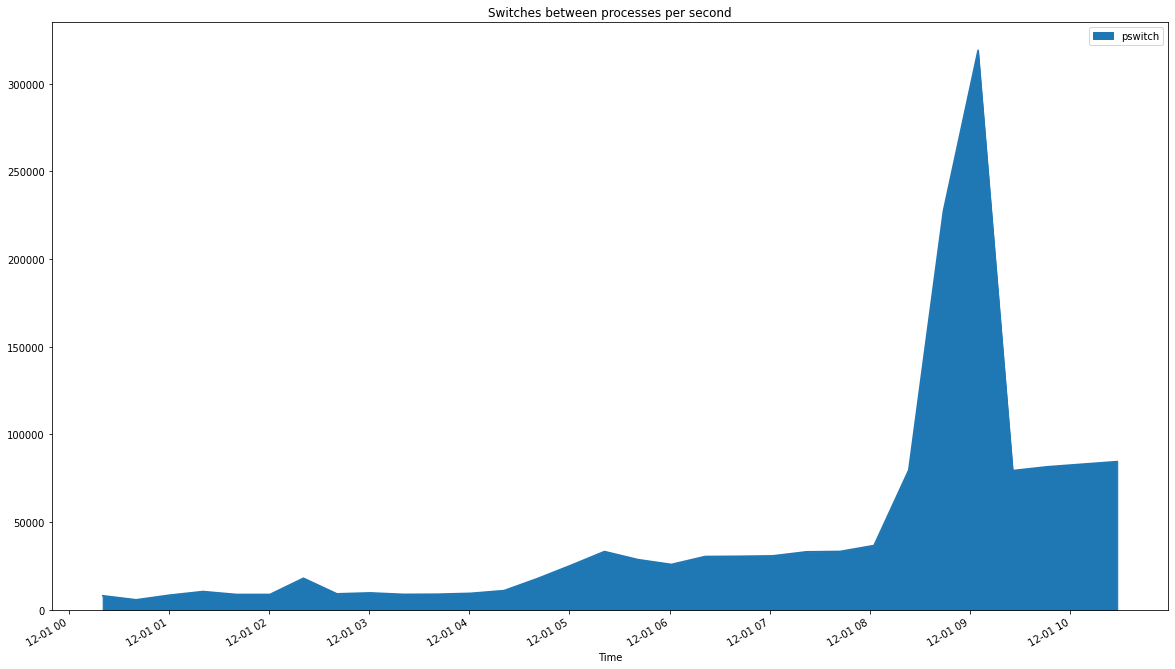

In [ ]:
chart = charts['PSWITCH']
n.timeframe(key=chart['key']).draw(**chart)

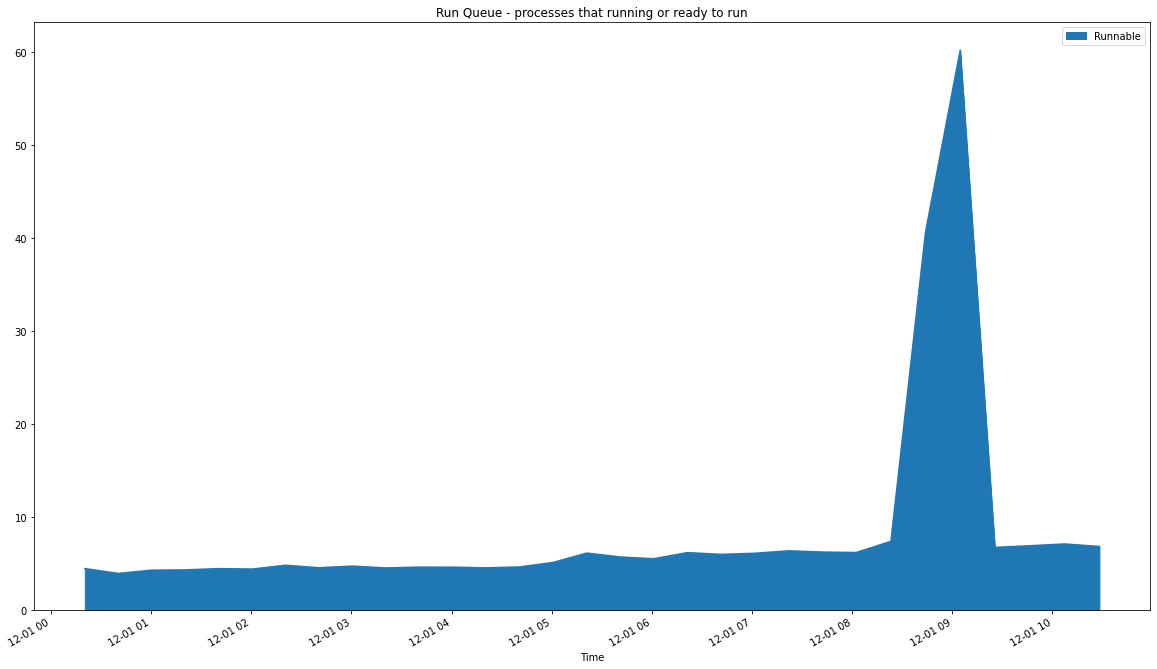

In [ ]:
chart = charts['RUNQ']
n.timeframe(key=chart['key']).draw(**chart)

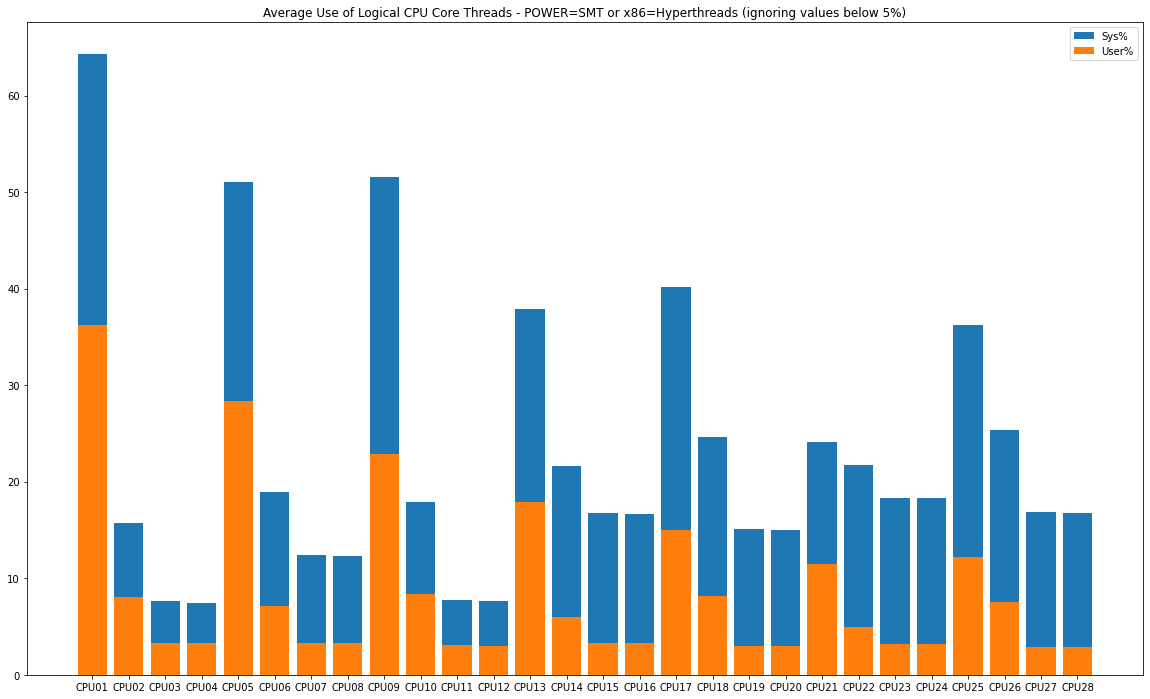

In [ ]:
chart = charts['CPU_MEAN']
n.compoundframe(key=chart['key']).draw(**chart)

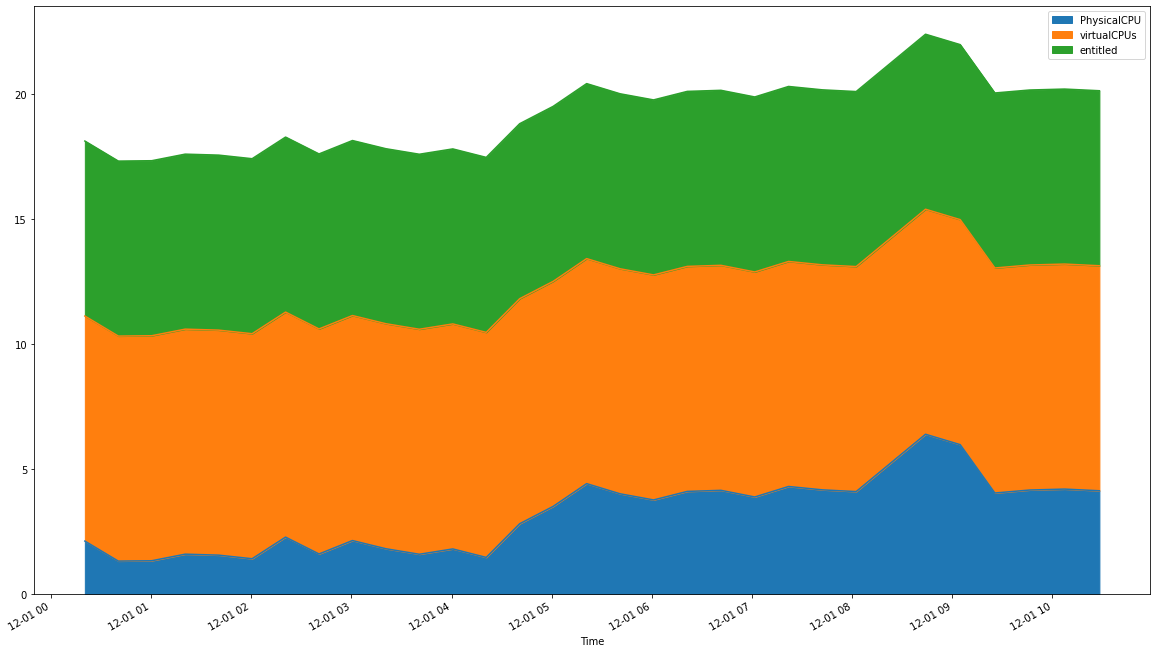

In [ ]:
chart = charts['PHYSICAL_CPU']
n.timeframe(key=chart['key']).draw(**chart)

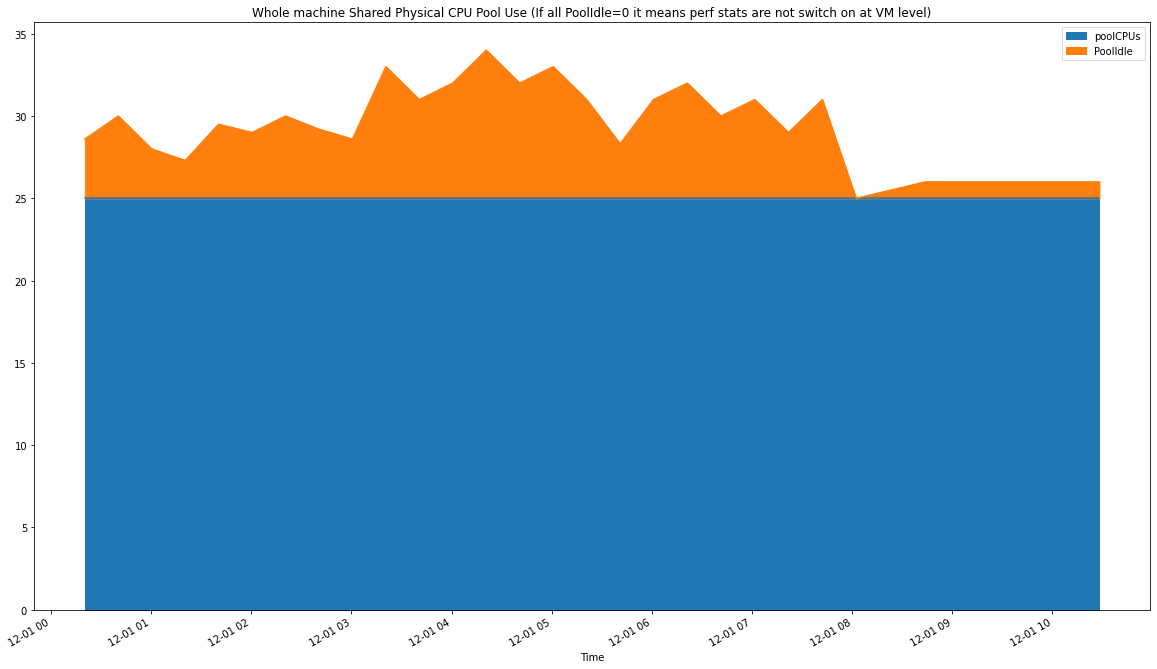

In [ ]:
chart = charts['POOLIDLE']
n.timeframe(key=chart['key']).draw(**chart)

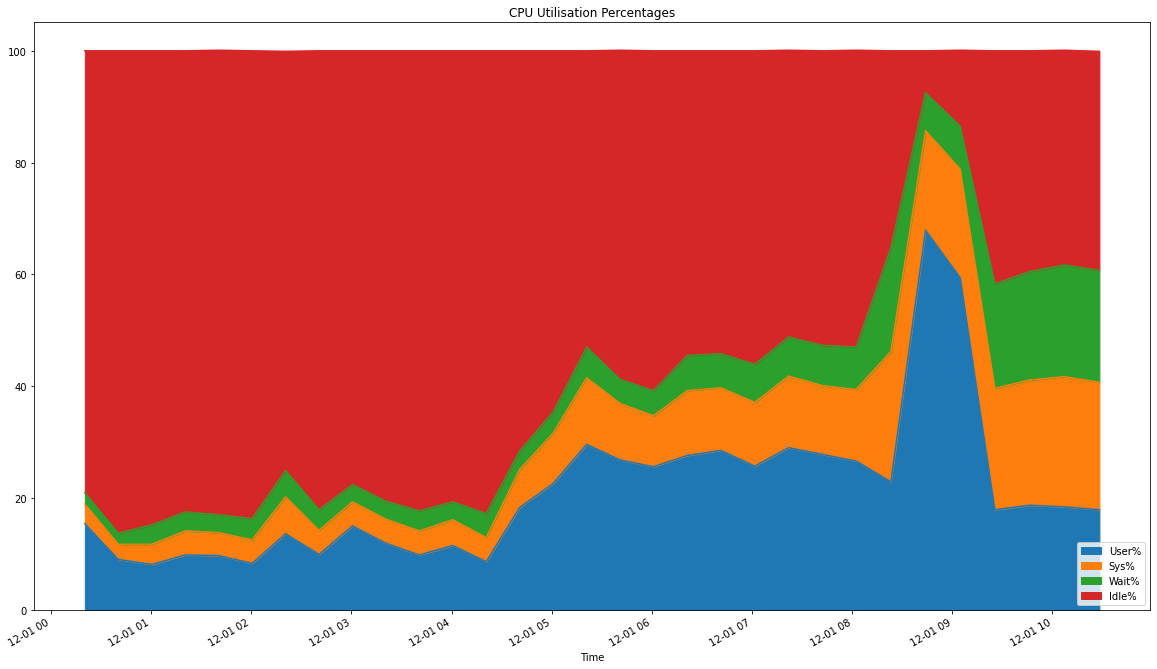

In [ ]:
chart = charts['CPUUTIL_ALL']
n.timeframe(key=chart['key']).draw(**chart)

In [ ]:
a = [*"RealPython"]
a

['R', 'e', 'a', 'l', 'P', 'y', 't', 'h', 'o', 'n']

In [ ]:
*a,b = "RealPython"
a,b

(['R', 'e', 'a', 'l', 'P', 'y', 't', 'h', 'o'], 'n')

In [ ]:
my_first_list = [1, 2, 3]
my_second_list = [4, 5, 6]
[*my_first_list, *my_second_list]

[1, 2, 3, 4, 5, 6]

In [ ]:
my_first_dict = {"A": 1, "B": 2}
my_second_dict = {"C": 3, "D": 4}
{**my_first_dict, **my_second_dict}

{'A': 1, 'B': 2, 'C': 3, 'D': 4}

In [ ]:
import ast
l = """
[1,2,3]
"""
type(ast.literal_eval(l))

list

In [ ]:
!pip install json5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for json5: filename=json5-0.9.8-py2.py3-none-any.whl size=18604 sha256=49adf010df6796c068ecd6bd9155415645c04b31bfcf64ff7061886b77917c94
  Stored in directory: /root/.cache/pip/wheels/ac/9b/de/6e4fd8f159d3dfa42c42ceddf2184fda29ea7fb1e8f5f8371c
Successfully built json5


In [ ]:
import json5
d1 = json5.loads('{a:1, b:2}')
d2 = json5.loads('{c:3, d:4}')
{**d1, **d2}

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [ ]:
Physical_CPU =  """ {
    title: 'Physical CPU Use of Shared CPU(s) (Note:if Entitlement=VP then LPAR is capped)',
    key: 'LPAR',
    columns: ['PhysicalCPU', 'virtualCPUs', 'entitled']
}
"""
json5.loads(Physical_CPU)

{'columns': ['PhysicalCPU', 'virtualCPUs', 'entitled'],
 'key': 'LPAR',
 'title': 'Physical CPU Use of Shared CPU(s) (Note:if Entitlement=VP then LPAR is capped)'}

In [ ]:
import datetime

start = datetime.datetime(2020,1,1)
delta = datetime.timedelta(days=30)
end = start + delta
f'{end}'

'2020-01-31 00:00:00'

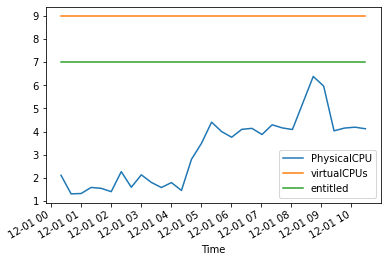

In [ ]:
n.timeframe(key='LPAR').df[['PhysicalCPU', 'virtualCPUs', 'entitled']].plot()

## configuration

In [ ]:
config_keys = list(set([item[0] for item in config_lines]))
config_keys

['BBBD', 'BBBP', 'AAA', 'BBBV', 'BBBL', 'BBBN', 'BBBB', 'BBBC']

In [ ]:
key = 'AAA'
{item[1]:item[2:] for item in config_lines if item[0] == key}

{'AIX': ['6.1.7.17'],
 'LPARNumberName': ['2', 'sampleC'],
 'MachineType': ['IBM', '8205-E6C'],
 'NodeName': ['sampleC'],
 'SerialNumber': ['06F412R'],
 'TL': ['07'],
 'build': ['AIX'],
 'command': ['/usr/bin/topas_nmon -F /SME/nmondata/2014/12/sampleC_20141201_00:00.nmon -T -s 1200 -c 72 -N -L -A -youtput_dir=/SME/nmondata/2014/12/sampleC_20141201_00:00.nmon -ystart_time=00:00:06',
  'Dec01',
  '2014'],
 'cpus': ['28', '28'],
 'date': ['01-DEC-2014'],
 'disks_per_line': ['150'],
 'hardware': ['Architecture PowerPC Implementation POWER7_in_P7_mode 64 bit'],
 'host': ['sampleC'],
 'interval': ['1200'],
 'kernel': [' HW-type=CHRP=Common H/W Reference Platform Bus=PCI LPAR=Dynamic Multi-Processor 64 bit'],
 'note0': [' Warning - use the UNIX sort command to order this file before loading into a spreadsheet'],
 'note1': [' The First Column is simply to get the output sorted in the right order'],
 'note2': [' The T0001-T9999 column is a snapshot number. To work out the actual time; see the 

In [ ]:
key = 'BBBB' # disk
key = 'BBBC' # lsvg -l
key = 'BBBD' # fc adapter
key = 'BBBP' # commands
set({item[2] for item in config_lines if item[0] == key})

{'WLMclasses',
 'WLMlimits',
 'WLMrules',
 'WLMshares',
 'emgr -l',
 'emstat',
 'ifconfig',
 'ioo -L',
 'ipcs -a',
 'lparstat -H',
 'lparstat -i',
 'lsattr -El aio0',
 'lsattr -El sys0',
 'lsconf',
 'lsps -a',
 'lssrad',
 'mount',
 'mpstat -d',
 'netstat',
 'nfso -L',
 'nfsstat -m',
 'nfsstat -n',
 'oslevel',
 'ps v',
 'schedo -L',
 'uptime',
 'vmo -L',
 'vmstat -i',
 'vmstat -s',
 'vmstat -v',
 'wlmcntrl -q'}

In [ ]:
key = 'BBBV' # lsvg, 'BBBL', 'BBBN'
[item[2:] for item in config_lines if item[0] == key][:22]

[['VOLUME GROUP:       rootvg                   VG IDENTIFIER:  00f7f41200004c000000013caffdfe0b'],
 ['VG STATE:           active                   PP SIZE:        128 megabyte(s)'],
 ['VG PERMISSION:      read/write               TOTAL PPs:      769 (98432 megabytes)'],
 ['MAX LVs:            256                      FREE PPs:       152 (19456 megabytes)'],
 ['LVs:                16                       USED PPs:       617 (78976 megabytes)'],
 ['OPEN LVs:           15                       QUORUM:         2 (Enabled)'],
 ['TOTAL PVs:          1                        VG DESCRIPTORS: 2'],
 ['STALE PVs:          0                        STALE PPs:      0'],
 ['ACTIVE PVs:         1                        AUTO ON:        yes'],
 ['MAX PPs per VG:     32512'],
 ['MAX PPs per PV:     1016                     MAX PVs:        32'],
 ['LTG size (Dynamic): 256 kilobyte(s)          AUTO SYNC:      no'],
 ['HOT SPARE:          no                       BB POLICY:      relocatable'],
 ['PV RESTR

In [ ]:
key = 'BBBL' # lslpar, 'BBBN'
[item[2:] for item in config_lines if item[0] == key]

[['lparno', '2'],
 ['lparname', 'sampleC'],
 ['CPU in sys', '12'],
 ['Virtual CPU', '7'],
 ['Logical CPU', '28'],
 ['Pool CPU', '8'],
 ['smt threads', '4'],
 ['capped', '0'],
 ['min Virtual', '1'],
 ['max Virtual', '7'],
 ['min Logical', '1'],
 ['max Logical', '28'],
 ['min Capacity', '1.0'],
 ['max Capacity', '7.0'],
 ['Entitled Capacity', '7.0'],
 ['Weight', '200'],
 ['min Memory MB', '1024'],
 ['max Memory MB', '94208'],
 ['online Memory', '63488'],
 ['pool id', '1'],
 ['Flags',
  'LPARed DRable SMT Shared UnCapped Migratable Not-Donating AMSable.']]

In [ ]:
key = 'BBBN' # network
[item[2:] for item in config_lines if item[0] == key]

[['NetworkName', 'MTU', 'Mbits', 'Name'],
 ['en8', '1500', '10240', 'Standard Ethernet Network Interface'],
 ['en9', '1500', '1024', 'Standard Ethernet Network Interface'],
 ['en10', '1500', '1024', 'Standard Ethernet Network Interface'],
 ['lo0', '16896', '0', 'Loopback Network Interface']]

# dataframe

In [ ]:
from sys import getsizeof, stderr
from itertools import chain
from collections import deque
try:
    from reprlib import repr
except ImportError:
    pass

def total_size(o, handlers={}, verbose=False):
    """ Returns the approximate memory footprint an object and all of its contents.

    Automatically finds the contents of the following builtin containers and
    their subclasses:  tuple, list, deque, dict, set and frozenset.
    To search other containers, add handlers to iterate over their contents:

        handlers = {SomeContainerClass: iter,
                    OtherContainerClass: OtherContainerClass.get_elements}

    """
    dict_handler = lambda d: chain.from_iterable(d.items())
    all_handlers = {tuple: iter,
                    list: iter,
                    deque: iter,
                    dict: dict_handler,
                    set: iter,
                    frozenset: iter,
                   }
    all_handlers.update(handlers)     # user handlers take precedence
    seen = set()                      # track which object id's have already been seen
    default_size = getsizeof(0)       # estimate sizeof object without __sizeof__

    def sizeof(o):
        if id(o) in seen:       # do not double count the same object
            return 0
        seen.add(id(o))
        s = getsizeof(o, default_size)

        if verbose:
            print(s, type(o), repr(o), file=stderr)

        for typ, handler in all_handlers.items():
            if isinstance(o, typ):
                s += sum(map(sizeof, handler(o)))
                break
        return s

    return sizeof(o)

In [ ]:
import sys

df = pd.DataFrame(data=data[key][1:], columns=data[key][0])
df['Time'] = df[df.columns[0]].map(timestamps)
df = df.set_index('Time')
df = df[df.columns[1:]]
for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')
sys.getsizeof(df), total_size(df), df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2014-12-01 00:20:22 to 2014-12-01 10:28:06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   User    31 non-null     float64
 1   Sys     31 non-null     float64
 2   Wait    31 non-null     float64
 3   Idle    31 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


(1272, 1272, None)

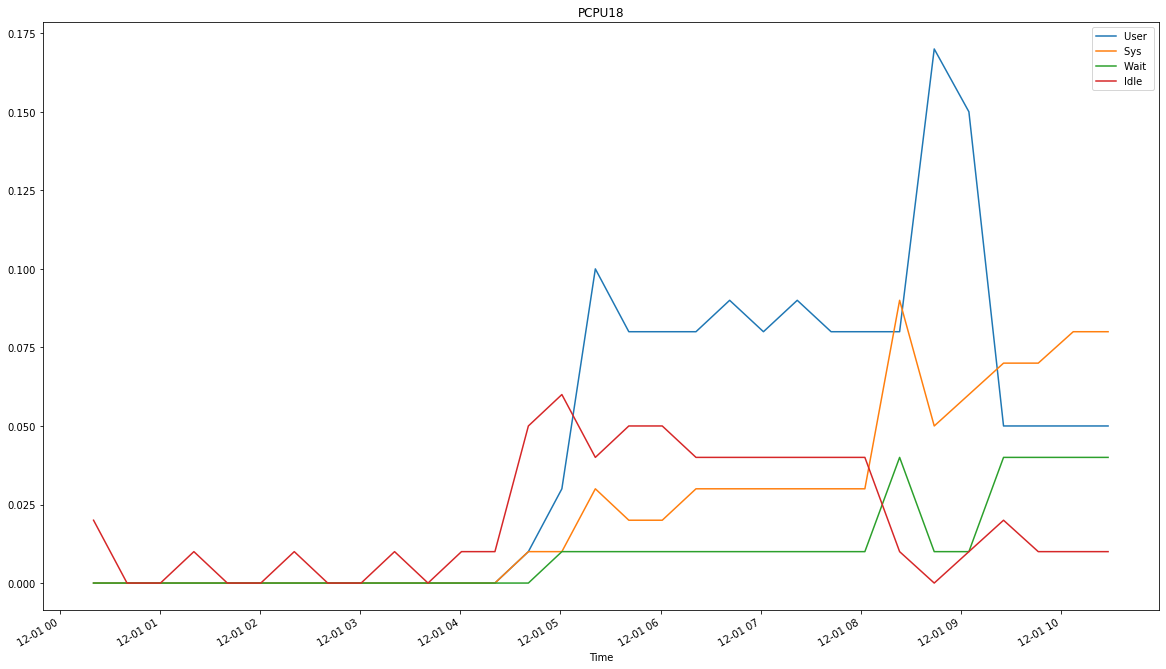

In [ ]:
df.plot(title=key,figsize=(20,12))

# regex

In [ ]:
data_lines = []
config_lines = []
zzzz = []

with open(file_name, 'r') as file:
  for line in file:
    line = line.strip()
    #if re.match(r'^MEM', line):  # 1. 'Memory sampleC'  REALMEM  2. VIRTMEM 
    if re.match(r'^AAA', line):
      config_lines.append(line.split(','))
    elif re.match(r'^BBB', line):
      config_lines.append(line.split(','))
    elif re.match(r'^ZZZZ', line):
      zzzz.append(line.split(',')[1:])
    else: 
      data_lines.append(line.split(','))

timestamps = {item[0]: dt.datetime.strptime(item[1]+item[2], "%H:%M:%S%d-%b-%Y") for item in zzzz}
headers = list(set([item[0] for item in data_lines]))
headers = [header for header in headers if not 'CPU' in header]
headers

['JFSINODE',
 'PAGE',
 'JFSFILE',
 'DISKXFER',
 'NETSIZE',
 'PROCAIO',
 'NFSSVRV3',
 'NETERROR',
 'LPAR',
 'LARGEPAGE',
 'DISKAVGWIO',
 'NFSCLIV2',
 'DISKWIO',
 'NETPACKET',
 'NFSSVRV2',
 'DISKREAD',
 'DISKBSIZE',
 'DISKRXFER',
 'PROC',
 'DISKAVGRIO',
 'NFSCLIV3',
 'POOLS',
 'DISKWRITE',
 'MEMUSE',
 'MEMNEW',
 'UARG',
 'NET',
 '25.531',
 'TOP',
 'DISKBUSY',
 'DISKRIO',
 'MEM',
 'IOADAPT',
 'FILE']

In [ ]:
header = headers[8]
print(header)
lpar = [line[1:] for line in data_lines if line[0] == header]
# check len
df = pd.DataFrame(data=lpar[1:], columns=lpar[0])
df['Time'] =  = df[df.columns[0]].map(timestamps)
df = df.set_index('Time'])
df = df[df.columns[1:]]
for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

LPAR
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2014-12-01 00:20:22 to 2014-12-01 10:28:06
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PhysicalCPU   30 non-null     float64
 1   virtualCPUs   30 non-null     int64  
 2   logicalCPUs   30 non-null     int64  
 3   poolCPUs      30 non-null     float64
 4   entitled      30 non-null     float64
 5   weight        30 non-null     float64
 6   PoolIdle      30 non-null     float64
 7   usedAllCPU%   30 non-null     float64
 8   usedPoolCPU%  30 non-null     float64
 9   SharedCPU     30 non-null     float64
 10  Capped        30 non-null     float64
 11  EC_User%      30 non-null     float64
 12  EC_Sys%       30 non-null     float64
 13  EC_Wait%      30 non-null     float64
 14  EC_Idle%      30 non-null     float64
 15  VP_User%      30 non-null     float64
 16  VP_Sys%       30 non-null     float64
 17  VP_Wait%      30 non-null     fl

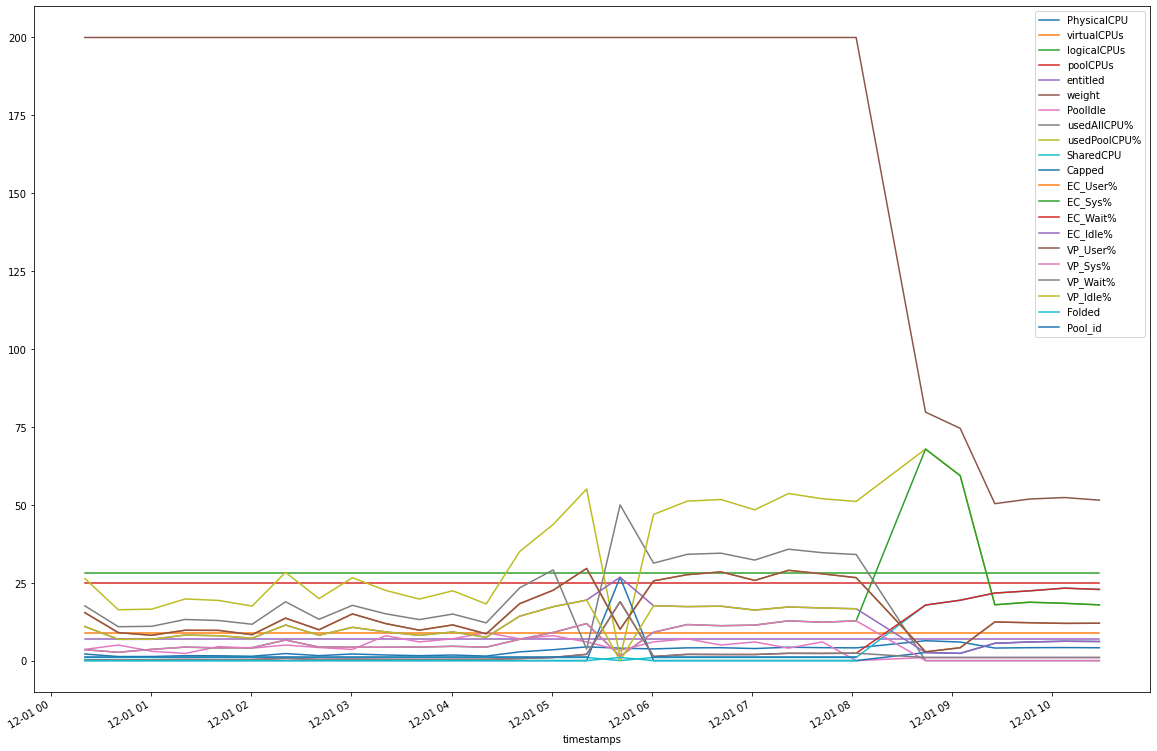

In [ ]:
df.plot(figsize=(20,14))

In [ ]:
top = [line[1:] for line in data_lines if line[0] == 'TOP']
print(top[:2])
[(array[0],array[-2]) for array in top[2:] if array[1] == 'T0002']

[['%CPU Utilisation'], ['+PID', 'Time', '%CPU', '%Usr', '%Sys', 'Threads', 'Size', 'ResText', 'ResData', 'CharIO', '%RAM', 'Paging', 'Command', 'WLMclass']]


[('31850666', 'oracle'),
 ('23265356', 'oracle'),
 ('0262156', 'lrud'),
 ('29229256', 'oracle'),
 ('24772678', 'oracle'),
 ('19988758', 'tnslsnr'),
 ('24248524', 'oracle'),
 ('24903974', 'oracle'),
 ('0589846', 'reaffin'),
 ('15859954', 'oracle'),
 ('26804702', 'java'),
 ('23724540', 'oracle'),
 ('24576486', 'oracle'),
 ('22741374', 'oracle'),
 ('6750462', 'oracle'),
 ('22675808', 'oracle'),
 ('19071216', 'oracle'),
 ('4522462', 'kuxagent'),
 ('29622450', 'oracle'),
 ('29360288', 'oracle'),
 ('16908288', 'oracle'),
 ('28901504', 'oracle'),
 ('27132144', 'oracle'),
 ('26477028', 'oracle'),
 ('22216744', 'oracle'),
 ('28966946', 'emagent'),
 ('13304078', 'oracle'),
 ('24576234', 'aioserver'),
 ('19333484', 'aioserver'),
 ('2490544', 'syncd'),
 ('6422782', 'aioserver'),
 ('23134612', 'oracle'),
 ('23658722', 'aioserver')]

In [ ]:
top = [line[1:] for line in data_lines if line[0] == 'TOP']
df = pd.DataFrame(data=top[2:], columns=top[1])
df['Time'] = df['Time'].map(timestamps)
df = df.set_index('Time')
df

,+PID,%CPU,%Usr,%Sys,Threads,Size,ResText,ResData,CharIO,%RAM,Paging,Command,WLMclass
Time,,,,,,,,,,,,,
2014-12-01 00:40:25,31850666,27.89,27.44,0.46,1,196472,36180,5816,139038,0,24,oracle,Unclassified
2014-12-01 00:40:25,23265356,5.05,5.05,0.00,1,175392,36180,1120,0,0,24,oracle,Unclassified
2014-12-01 00:40:25,0262156,2.23,2.23,0.00,5,832,0,832,0,0,0,lrud,Unclassified
2014-12-01 00:40:25,29229256,1.42,1.29,0.13,1,174904,36180,2544,909,0,774,oracle,Unclassified
2014-12-01 00:40:25,24772678,1.39,1.27,0.12,1,177356,36180,4248,898,0,755,oracle,Unclassified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-01 10:28:06,26411130,0.10,0.07,0.04,1,171824,25420,452,0,0,19,oracle,Unclassified
2014-12-01 10:28:06,11403276,0.10,0.10,0.01,1,173444,29184,324,14269,0,62,oracle,Unclassified
2014-12-01 10:28:06,27394068,0.10,0.10,0.00,1,179272,28172,320,0,0,17,oracle,Unclassified


In [ ]:
df.groupby('+PID')['Command'].count()

+PID
0262156     30
0589846     30
10027076     1
10158340     1
10223974     1
            ..
9764908      1
9765260     16
9830668      1
9961536      2
9961902      1
Name: Command, Length: 354, dtype: int64

In [ ]:
df.loc[df['+PID'] == '9765260']

,+PID,%CPU,%Usr,%Sys,Threads,Size,ResText,ResData,CharIO,%RAM,Paging,Command,WLMclass
Time,,,,,,,,,,,,,
2014-12-01 05:00:54,9765260,0.11,0.11,0.00,1,179612,41276,320,272,0,60,oracle,Unclassified
2014-12-01 05:20:57,9765260,0.12,0.12,0.00,1,179612,30308,784,840,0,65,oracle,Unclassified
2014-12-01 05:41:00,9765260,0.10,0.10,0.00,1,179616,38060,912,855,0,59,oracle,Unclassified
2014-12-01 06:01:02,9765260,0.11,0.11,0.00,1,179668,36324,328,340,0,61,oracle,Unclassified
2014-12-01 06:21:14,9765260,0.11,0.11,0.00,1,179668,35512,328,835,0,65,oracle,Unclassified
2014-12-01 06:41:24,9765260,0.11,0.11,0.00,1,179668,37488,896,268,0,63,oracle,Unclassified
2014-12-01 07:01:39,9765260,0.11,0.11,0.00,1,179668,39476,320,32,0,64,oracle,Unclassified
2014-12-01 07:21:54,9765260,0.11,0.11,0.00,1,179668,43420,320,268,0,64,oracle,Unclassified
2014-12-01 07:42:10,9765260,0.11,0.11,0.00,1,179668,38404,320,832,0,66,oracle,Unclassified


In [ ]:
header = headers[2]
[line[1:] for line in data_lines if line[0] == header]

[['PCPU 13 sampleC', 'User ', 'Sys ', 'Wait ', 'Idle'],
 ['T0001', '0.08', '0.01', '0.00', '0.00'],
 ['T0002', '0.03', '0.00', '0.00', '0.00'],
 ['T0003', '0.03', '0.01', '0.00', '0.00'],
 ['T0004', '0.04', '0.01', '0.00', '0.00'],
 ['T0005', '0.04', '0.01', '0.00', '0.00'],
 ['T0006', '0.03', '0.01', '0.00', '0.00'],
 ['T0007', '0.10', '0.03', '0.00', '0.00'],
 ['T0008', '0.04', '0.01', '0.00', '0.00'],
 ['T0009', '0.15', '0.02', '0.00', '0.00'],
 ['T0010', '0.06', '0.01', '0.00', '0.00'],
 ['T0011', '0.04', '0.01', '0.00', '0.00'],
 ['T0012', '0.04', '0.01', '0.00', '0.00'],
 ['T0013', '0.03', '0.01', '0.00', '0.00'],
 ['T0014', '0.14', '0.02', '0.00', '0.00'],
 ['T0015', '0.14', '0.04', '0.00', '0.00'],
 ['T0016', '0.25', '0.07', '0.01', '0.00'],
 ['T0017', '0.20', '0.05', '0.01', '0.00'],
 ['T0018', '0.18', '0.05', '0.00', '0.00'],
 ['T0019', '0.22', '0.06', '0.01', '0.00'],
 ['T0020', '0.23', '0.06', '0.01', '0.00'],
 ['T0021', '0.20', '0.06', '0.01', '0.00'],
 ['T0022', '0.25', '

In [ ]:
for header in headers:
  lines = [line for line in data_lines if line[0] == header]
  print(f'{lines[0]}\n{lines[1]}')


['JFSINODE', 'JFS Inode %Used sampleC', '/', '/home', '/usr', '/var', '/tmp', '/admin', '/opt', '/var/adm/ras/livedump', '/oraredo1', '/oraredo2', '/oraredo3', '/oradata', '/orabk', '/oraarch', '/oratemp', '/orainst', '/oradata2', '/oraarch2', '/orabk2', '/csi', '/nmon', '/a02', '/a03', '/opt/IBM/ITM', '/SME']
['JFSINODE', 'T0001', '1.5', '2.4', '9.3', '1.1', '2.0', '0.0', '3.5', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '3.3', '0.0', '0.0', '0.0', '0.0', '0.0', '3.2', '14.8', '1.4', '0.9']
['PAGE', 'Paging sampleC', 'faults', 'pgin', 'pgout', 'pgsin', 'pgsout', 'reclaims', 'scans', 'cycles']
['PAGE', 'T0001', '23943.7', '3075.9', '2426.7', '2578.4', '2028.5', '3802.2', '42481.1', '9.5']
['JFSFILE', 'JFS Filespace %Used sampleC', '/', '/home', '/usr', '/var', '/tmp', '/admin', '/opt', '/var/adm/ras/livedump', '/oraredo1', '/oraredo2', '/oraredo3', '/oradata', '/orabk', '/oraarch', '/oratemp', '/orainst', '/oradata2', '/oraarch2', '/orabk2', '/csi', '/nmon', '/a02', '/a03'

IndexError: ignored

In [ ]:
import re
re.findall(r'^AAA', line.decode())

['AAA']

In [ ]:
#line = line.decode()
m = re.match(r'^AAA', line)
if m:
  line = line.split(',')
line

['AAA', 'progname', 'topas_nmon\n']

In [ ]:
 def processLine(self, header, line):
        if "AAA" in header:
            # we are looking at the basic System Specs
            self.sysInfo.append(line[1:])
        elif "BBB" in header:
            # more detailed System Spec
            # do more granular processing
            # refer to pg 11 of analyzer handbook
            self.bbbInfo.append(line)
        elif "ZZZZ" in header:
            self.tStamp[line[1]] = line[3] + " " + line[2]
        else:
            if "TOP" in line[0] and len(line) > 3:
                    # top lines are the only ones that do not have the timestamp
                    # as the second column, therefore we rearrange for parsing.
                    # kind of a hack, but so is the rest of this parsing
                pid = line[1]
                line[1] = line[2]
                line[2] = pid

            if line[0] in self.processedData.keys():
                table = self.processedData[line[0]]
                for n, col in enumerate(table):
                    # line[1] give you the T####
                    if n == 0 and line[n + 1] in self.tStamp.keys():
                        # lookup the time stamp in tStamp
                        col.append(self.tStamp[line[n + 1]])

                    elif n == 0 and line[n + 1] not in self.tStamp.keys():
                        log.warn(
                            "Discarding line with missing Timestamp %s" % line)
                        break

                    else:
                        # TODO: do parsing(str2float) here
                        if len(line) > n + 1:
                            col.append(line[n + 1])
                        else:
                            # somehow we are missing an entry here
                            # As in we have a heading, but no data
                            log.debug("We found more column titles than data for the category:" +
                                        line[0] + ". This has been observed with some versions of NMON on AIX")
                            log.debug(
                                "This tends to happen with the LPAR readings, double check whether your data makes sense, if so you can ignore this.")
                            col.append("0")
                        # this should always be a float
                        # try:
                        #	col.append(float(line[n+1]))
                        # except:
                        #	print line[n+1]
                        #	col.append(line[n+1])

            else:
                # new column, hoping these are headers
                # We are expecting a header row like:
                # CPU01,CPU 1 the-gibson,User%,Sys%,Wait%,Idle%
                header = []
                if "TOP" in line[0] and len(line) < 3:
                    # For some reason Top has two header rows, the first with only
                    # two columns and then the real one therefore we skip the first row
                    pass
                else:
                    for h in line[1:]:
                        # make it an array
                        tmp = []
                        tmp.append(h)
                        header.append(tmp)
                    self.processedData[line[0]] = header


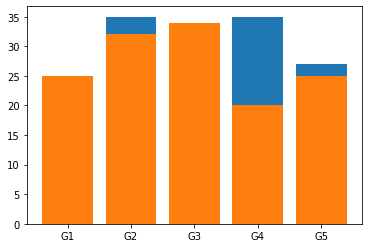

In [ ]:
import matplotlib.pyplot as plt

names = ['G1', 'G2', 'G3', 'G4', 'G5']
pos = np.arange(5)
men_values = [20, 35, 30, 35, 27]
women_values = [25, 32, 34, 20, 25]

fig, ax = plt.subplots()
ax.bar(names, men_values, label='Men')
ax.bar(names, women_values, label='Women')
fig.show()

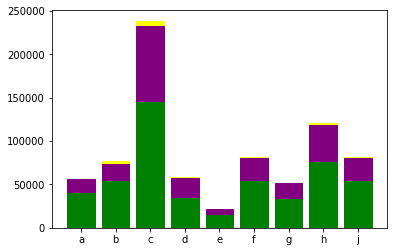

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j']
pos = np.arange(9)
var_one = np.array([40348, 53544, 144895, 34778, 14322, 53546, 33623, 76290, 53546])
var_two = np.array([15790, 20409, 87224, 22085, 6940, 27099, 17575, 41862, 27099])
var_three = np.array([692, 3254, 6645, 1237, 469, 872, 569, 3172, 872])

plt.bar(pos, np.add(np.add(var_three, var_two), var_one), color='yellow', edgecolor='yellow')
plt.bar(pos, np.add(var_two, var_one), color='purple', edgecolor='purple')
plt.bar(pos, var_one, color='green', edgecolor='green')
plt.xticks(pos, columns)
plt.show()

<BarContainer object of 9 artists>

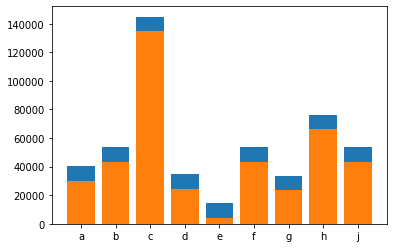

In [ ]:
columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j']
pos = np.arange(9)
var_one = np.array([40348, 53544, 144895, 34778, 14322, 53546, 33623, 76290, 53546])
var_two = var_one - 10202

plt.bar(columns, var_one)
plt.bar(columns, var_two)

# plt.xticks(pos, columns)
# plt.show()

In [ ]:
import random
import socket
import string
import time

def random_str(length=16):
    """生成字母和数组组成的随机字符串
    :param int length: 字符串长度
    """
    candidates = string.ascii_letters + string.digits
    return ''.join(random.SystemRandom().choice(candidates) for _ in range(length))

random_str()

'Lgk3C0YnxsJYIysG'

In [ ]:
def print_row_of_as(ints):
  for k in map(lambda n: n*n, ints):
    print('a' * k)

print_row_of_as([1,2,3])

a
aaaa
aaaaaaaaa


In [ ]:
list(map(lambda n: n*n, [1,2,3]))

[1, 4, 9]

In [ ]:
[n*n for n in [1,2,3]]

[1, 4, 9]

In [ ]:
def fib(n, a = 0, b = 1):
    if n == 0:
        return a
    if n == 1:
        return b
    return fib(n - 1, b, a + b)

fib(20)

6765

In [ ]:
import subprocess

cmd = 'cd /root && tar --checkpoint=100 --checkpoint-action=dot -xzf /root/linux-650082a559a570d6c9d2739ecc62843d6f951059.tar.gz'
subprocess.check_call(cmd, shell=True)

In [ ]:
url = 'https://raw.githubusercontent.com/Hexxeh/rpi-firmware/ea9e10e531a301b3df568dccb3c931d52a469106/git_hash'

from urllib.request import urlretrieve

file_name, response = urlretrieve(url, 'linux-650082a559a570d6c9d2739ecc62843d6f951059.tar.gz')
file_name

'linux-650082a559a570d6c9d2739ecc62843d6f951059.tar.gz'

In [ ]:
!tar xzf linux-650082a559a570d6c9d2739ecc62843d6f951059.tar.gz


gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [ ]:
cmd = 'tar -xzf linux-650082a559a570d6c9d2739ecc62843d6f951059.tar.gz'
subprocess.check_call(cmd, shell=True)

In [ ]:
def append(n, l=None):
  if l is None:
    l = []
  l.append(n)
  return l

append(0),append(*[1, 2, 3])

TypeError: ignored

# The Liskov Substitution Principle (LSP) 
states that subtypes must be substitutable for their base types. When this principle is violated, it tends to result in a lot of extra conditional logic scattered throughout the application, checking to see the specific type of an object.

In [ ]:
# Liskov subsitution violation
import collections

Point = collections.namedtuple('Point', ['x', 'y'])
p = Point(1, 2)
p.x, p[1], p._asdict()

(1, 2, OrderedDict([('x', 1), ('y', 2)]))

In [ ]:
tuple((1, 2))

(1, 2)

In [ ]:
t = (1, 2)
type(t), type(p) == type(t)

(tuple, False)

In [ ]:
isinstance(p, tuple)

True

# namedtuple

In [ ]:
import csv

with open('/content/sample_data/california_housing_train.csv', 'rt') as f:
  housing_csv = f.read()
housing_csv

'"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"\n-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000\n-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000\n-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000\n-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000\n-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000\n-114.580000,33.630000,29.000000,1387.000000,236.000000,671.000000,239.000000,3.343800,74000.000000\n-114.580000,33.610000,25.000000,2907.000000,680.000000,1841.000000,633.000000,2.676800,82400.000000\n-114.590000,34.830000,41.000000,812.000000,168.000000,375.000000,158.000000,1.708300,48500.000000\n-114.590000,33.610000,34.000000,4789.000000,1175.000000,3

In [ ]:
CaliforniaHousing = collections.namedtuple('Housing',["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"])
out = []
with open('/content/sample_data/california_housing_train.csv', 'rt') as text_io:
  for house in map(CaliforniaHousing._make, csv.reader(text_io)):
    out.append([house.longitude, house.latitude])
out[:4]

[['longitude', 'latitude'],
 ['-114.310000', '34.190000'],
 ['-114.470000', '34.400000'],
 ['-114.560000', '33.690000']]

In [ ]:
from contextlib import redirect_stdout

with open('out.txt', 'w') as f:
    with redirect_stdout(f):
        print(out)

In [ ]:
# range_len_pattern to zip

a = [1, 2, 3]
b = [4, 5, 6]

for i in range(len(b)):
  av = a[i]
  bv = b[i]
  print(i, av, bv)

# better with zip
for av, bv in zip(a, b):
  print(av, bv)

for i, (av, bv) in enumerate(zip(a, b)):
  print(i, av, bv)

0 1 4
1 2 5
2 3 6
1 4
2 5
3 6
0 1 4
1 2 5
2 3 6


In [ ]:
# looping over keys 
# in dict keys() is default
d = {
  'a': 1,
  'b': 2,
  'c': 3
}

list(d), list(d.keys()), d.items() 

(['a', 'b', 'c'], ['a', 'b', 'c'], dict_items([('a', 1), ('b', 2), ('c', 3)]))

In [ ]:
for key in d:
  print(key)

for v in d.values():
  print(v)

a
b
c
1
2
3


In [ ]:
'a' in d, 1 in d.values() #d.values() is view not a copy 

(True, True)

In [ ]:
# time.time() is not perf_counter!!
import time

start = time.perf_counter()
time.sleep(1)
end = time.perf_counter()
end - start, time.time()

(1.0005508289996214, 1660387645.5639656)

In [ ]:
import subprocess
subprocess.run(['ls', '-la'], capture_output=True)

CompletedProcess(args=['ls', '-la'], returncode=0, stdout=b'total 20\ndrwxr-xr-x 1 root root 4096 Aug 17 08:27 .\ndrwxr-xr-x 1 root root 4096 Aug 17 07:45 ..\ndrwxr-xr-x 4 root root 4096 Aug 15 13:44 .config\ndrwxr-xr-x 1 root root 4096 Aug 15 13:44 sample_data\n-rw-r--r-- 1 root root    6 Aug 17 08:34 text.txt\n', stderr=b'')

In [ ]:
condition = True

x = 1 if condition else 0
x

1

In [ ]:
ten_mils = 10_000_000
f'{ten_mils:_}', f'{ten_mils:,}'

('10_000_000', '10,000,000')

In [ ]:
class Person():
  ...

p = Person()
setattr(p, 'firstName', 'Leo')
setattr(p, 'lastName', 'Trotsky')
p.firstName, p.lastName

('Leo', 'Trotsky')

In [ ]:
getattr(p, 'firstName')

'Leo'

In [ ]:
class A:
    def __getattr__(self, key):
        return f'Value for attribute {key}'

a = A()
a.b

'Value for attribute b'

In [ ]:
# list of checklist words that are considered "True"-ish
truish_words = ['yes', u'yeah', u'y', u'1', u'ja', u'tak', u'yep', u'true', u'right', u'si', u'sí', u'da',
                'jes', u'হ্যা', u'জি', u'Да', u'हाँ', u'ya', u'já', u'hai', u'éé', u'eh', u'cha', u'baht',
                'نعم', u'aye', u'bai', u'হাঁ', u'affirmative', u'positive', u'+ve', u'+', u'是的', u'oo',
                'はい', u'예', u'네', u'так', u'ja', u'wahr', u'richtig', u'korrekt', u'כן', u'נכון']

words = 'I said yes'
# Containment Test: obj in seq -- contains(seq, obj)
any([word.strip().lower() in truish_words for word in words.split()])

True

In [ ]:
import operator
operator.contains('ABC', 'A'), 'A' in 'ABC'

(True, True)

## modulus

The modulus-function computes the remainder of a division, which is the "leftover" of an integral division.

## floor

The floor-function provides the lower-bound of an integral division. The upper-bound is computed by the ceil function. (Basically speaking, the floor-function cuts off all decimals)

In [ ]:
a,b = 5, 2
a % b, a // b

(1, 2)

In [ ]:
a,b = 5, 2
operator.mod(a, b) == a % b, a // b == operator.floordiv(a, b)

(True, True)

hexagon_grid

In [ ]:
import numpy as np
PI = np.pi
TAU = 2*PI

exradius = 10
inradius = exradius * (np.sqrt(3)/2.0)
angles = (np.array((0,1,2,3,4,5))/6) * TAU
yoffset = exradius * np.cos(angles)
xoffset = exradius * np.sin(angles)

def hexagon_vertices(center):
  center = np.array(center)
  pointsx = xoffset + center[0]
  pointsy = yoffset + center[1]
  return np.array((pointsx, pointsy)).T

def hexagon_coordinates(r, c):
    return ((c+r*0.5)*inradius*2,r*1.5*exradius)

hexagon_vertices([10,10]), hexagon_coordinates(10,20)

(array([[10.        , 20.        ],
        [18.66025404, 15.        ],
        [18.66025404,  5.        ],
        [10.        ,  0.        ],
        [ 1.33974596,  5.        ],
        [ 1.33974596, 15.        ]]), (433.0127018922193, 150.0))

In [ ]:
inradius

8.660254037844386

In [ ]:
from collections import OrderedDict
od = OrderedDict({'my': 2, 'name ': 4, 'is': 2, 'Mohan' :5})
getattr(od, 'my')

AttributeError: ignored

In [ ]:
from urllib.request import urlretrieve
from typing import NamedTuple
from collections import namedtuple

who_life_url = 'https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv'
file_name, response = urlretrieve(who_life_url, r'sample_data/who_life_expectancy.csv')
headers_tuples = response._headers

Headers = namedtuple("Headers", ["name", "value"])

(
headers_tuples[:3],
[Headers(*headers_tuple) for headers_tuple in headers_tuples][:3]
[Headers._make(headers_tuple) for headers_tuple in headers_tuples][:3]
)

SyntaxError: ignored

# PGP (pretty good privacy)
perl implementation of the same PGP (pretty good privacy) that the US government classified (literally) as the destructive equivalent of nuclear weapons material. It got Phil Zimmerman arrested and pretty much wrecked his life until the EFF stepped in to provide him with legal defense. This ended up being very close to the same RSA encryption currently used to set up the secure communications between web sites and browsers (after exchange of keys using RSA, communication proceeds using AES). 

In [ ]:
#!/bin/perl -s-- -export-a-crypto-system-sig -RSA-3-lines-PERL
$m=unpack(H.$w,$m."\0"x$w),$_=`echo "16do$w 2+4Oi0$d*-^1[d2%Sa2/d0<X+d*La1=z\U$n%0]SX$k"[$m*]\EszlXx++p|dc`,s/^.|\W//g,print pack('H*',$_)while read(STDIN,$m,($w=2*$d-1+length($n)&~1)/2)

template<typename T>
